**PROJEKT - ALGORYTMY UCZENIA MASZYNOWEGO**

--> [Link do Github'a](https://github.com/wiktor-kawa/Algorytmy-Uczenia-Maszynowego---Projekt) <--

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
#załadowanie danych z bazy danych
df = pd.read_csv('car.data', header = None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

**OPIS CECH**<br>
*buying - cena zakupu samochodu*<br>
*maint - cena utrzymania samochodu*<br>
*doors - liczba drzwi*<br>
*persons - pojemność w przeliczeniu na liczbę osób*<br>
*lub_boot - wielkość bagażnika*<br>
*safety - szacunkowe bezpieczeństwo samochodu*<br>
*class - stan akceptowalności pojazdu*<br>

**OPIS ETYKIET**<br>
*unacc - unacceptable*<br>
*acc - acceptable*<br>
*good - good*<br>
*vgood - very good*<br>


In [5]:
#wyświetlenie części bazy danych
print(df.shape)
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
#Zliczanie samochodów o określonych atrybutach oraz etykiet
i = 0
liczba_vhigh = 0
liczba_unacc = 0
while i < df.shape[0]: 
    if (df['buying'][i] == "vhigh") & (df['maint'][i] == "vhigh"): #zliczanie liczby aut o wysokiej cenie i drogich w utrymaniu
        liczba_vhigh = liczba_vhigh + 1
    if df['class'][i] == "vgood":
        liczba_unacc = liczba_unacc + 1
    i = i + 1

print('Liczba aut o wysokiej cenie i drogich w utrzymaniu - ' + str(liczba_vhigh))
print("Liczba aut z etykietą 'unacceptable' - " + str(liczba_unacc))

Liczba aut o wysokiej cenie i drogich w utrzymaniu - 108
Liczba aut z etykietą 'unacceptable' - 65


In [25]:
data = df.values
X = data[:,:-1]      #zmienna X - zbiór wektorów cech
y = data[:,-1]       #zmienna y - zbiór etykiet dla obiektów znajdujących się w zbiorze
print("Wymiary tablic X i y:")
print(X.shape, y.shape)
print()
print("Zbiór wektorów cech:")
print(X)
print()
print("Zbiór etykiet:")
print(y)

Wymiary tablic X i y:
(1728, 6) (1728,)

Zbiór wektorów cech:
[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]

Zbiór etykiet:
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


**PODZIAŁ DANYCH NA ZBIÓR TRENINGOWY I TESTOWY**

In [9]:
from sklearn import model_selection
podzial = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)  #80% danych - zbiór treningowy, 20% danych - zbiór testowy
X_train, X_test, y_train, y_test = podzial
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)    #wymiary zbiorów testowych i treningowych

(1382, 6) (1382,)
(346, 6) (346,)


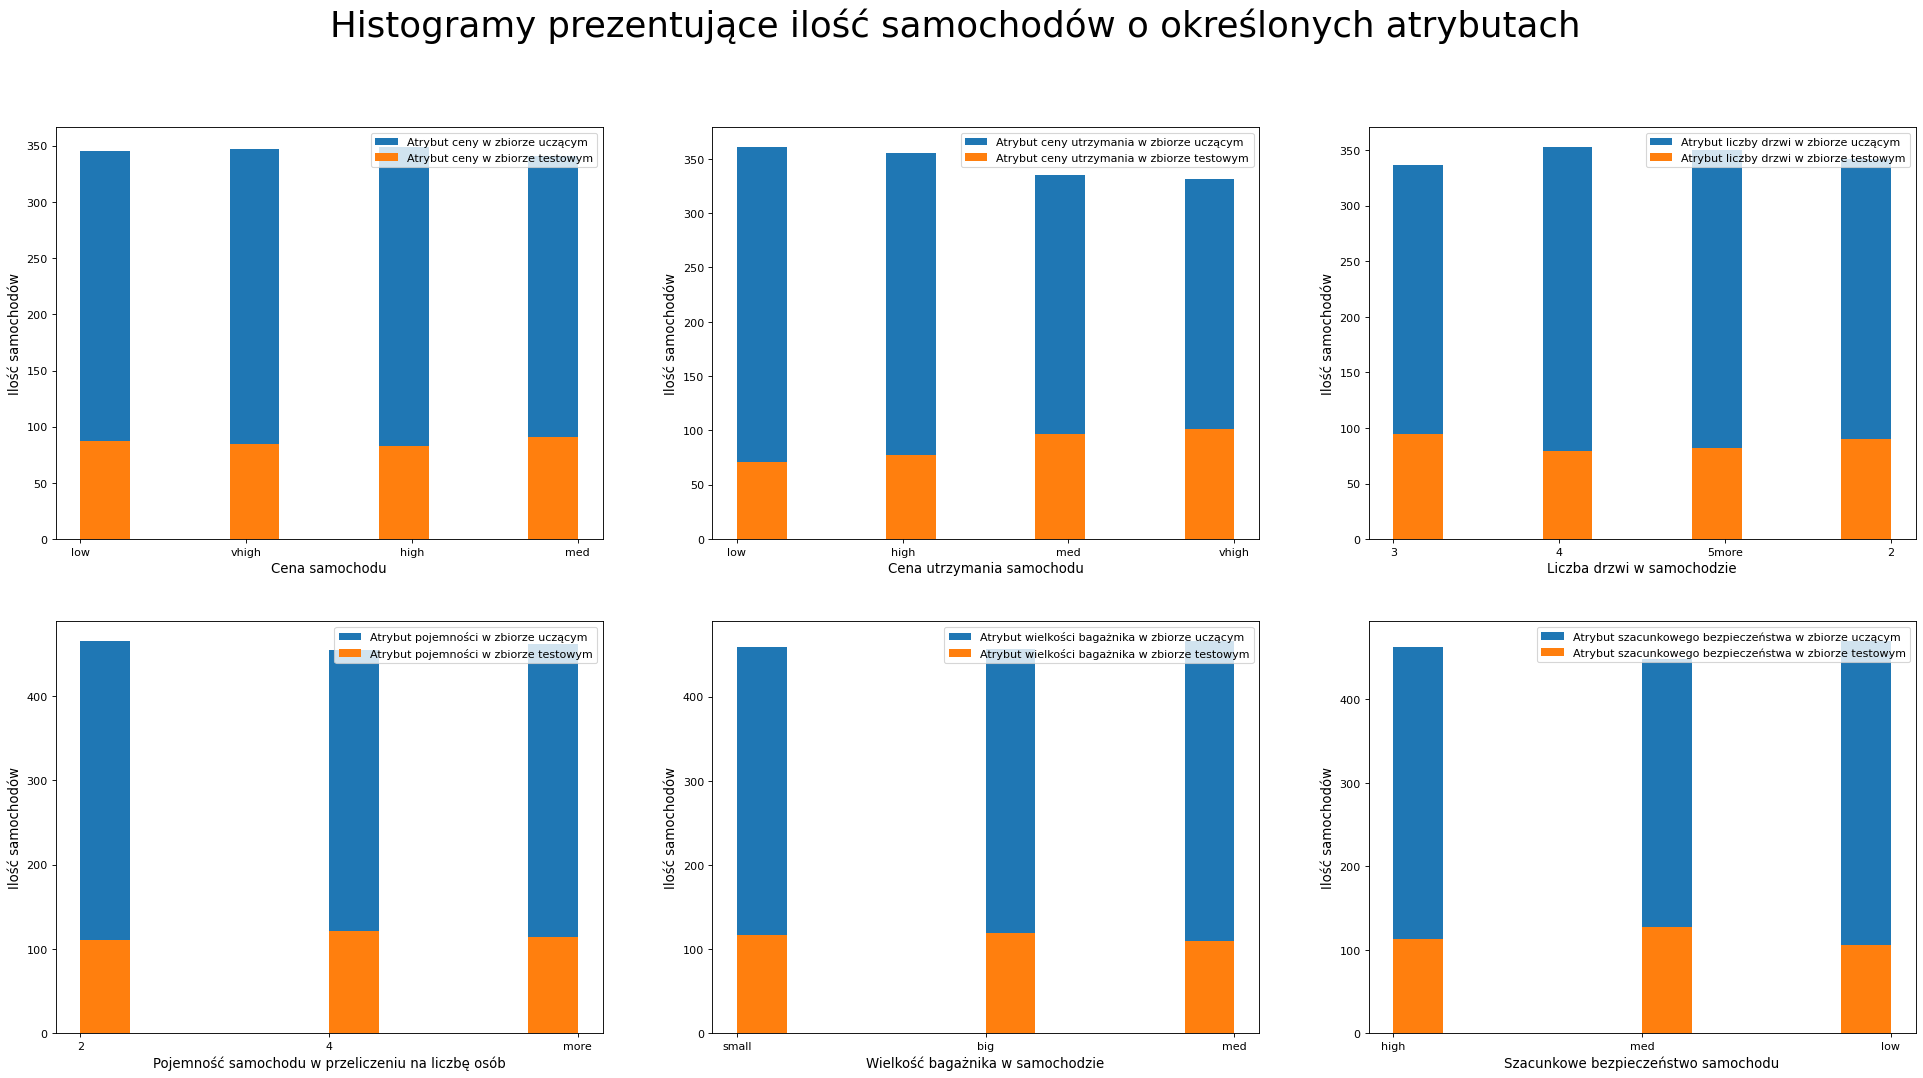

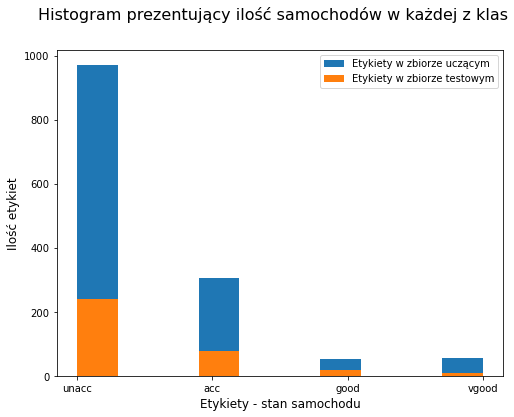

In [103]:
#wykreślanie histogramów atrybutów z podziałem na dane treningowe/testowe
from matplotlib.pyplot import figure
buying_train = X_train[:,0]
buying_test = X_test[:,0]
maint_train = X_train[:,1]
maint_test = X_test[:,1]
doors_train = X_train[:,2]
doors_test = X_test[:,2]
persons_train = X_train[:,3]
persons_test = X_test[:,3]
lug_boot_train = X_train[:,4]
lug_boot_test = X_test[:,4]
safety_train = X_train[:,5]
safety_test = X_test[:,5]

fig = plt.figure(figsize=(30, 15), dpi = 80)
fig.suptitle('Histogramy prezentujące ilość samochodów o określonych atrybutach', fontsize = 32)

fig.add_subplot(2, 3, 1)
plt.hist(buying_train)
plt.hist(buying_test)
plt.xlabel("Cena samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut ceny w zbiorze uczącym","Atrybut ceny w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 2)
plt.hist(maint_train)
plt.hist(maint_test)
plt.xlabel("Cena utrzymania samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut ceny utrzymania w zbiorze uczącym","Atrybut ceny utrzymania w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 3)
plt.hist(doors_train)
plt.hist(doors_test)
plt.xlabel("Liczba drzwi w samochodzie", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut liczby drzwi w zbiorze uczącym","Atrybut liczby drzwi w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 4)
plt.hist(persons_train)
plt.hist(persons_test)
plt.xlabel("Pojemność samochodu w przeliczeniu na liczbę osób", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut pojemności w zbiorze uczącym","Atrybut pojemności w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 5)
plt.hist(lug_boot_train)
plt.hist(lug_boot_test)
plt.xlabel("Wielkość bagażnika w samochodzie", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut wielkości bagażnika w zbiorze uczącym","Atrybut wielkości bagażnika w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 6)
plt.hist(safety_train)
plt.hist(safety_test)
plt.xlabel("Szacunkowe bezpieczeństwo samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut szacunkowego bezpieczeństwa w zbiorze uczącym","Atrybut szacunkowego bezpieczeństwa w zbiorze testowym"], loc = 'upper right')

#wykreślenie histogramu dla etykiet
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Histogram prezentujący ilość samochodów w każdej z klas', fontsize = 16)

plt.hist(y_train)
plt.hist(y_test)
plt.xlabel("Etykiety - stan samochodu", fontsize = 12)
plt.ylabel("Ilość etykiet", fontsize = 12)
plt.legend(["Etykiety w zbiorze uczącym","Etykiety w zbiorze testowym"])

In [1]:
#Algorytmy -> Drzewa decyzyjne, MLP, naiwny Bayes
#SVM - raczej dane ciągłe!

In [33]:
from sklearn import tree
from sklearn import metrics

clf_tree = DecisionTreeClassifier(max_depth = 2)
clf_tree.fit(X_train, y_train)

prediction = clf_tree.predict([[4,3,2,2,2,3]])
print('Printing the prediction: ')
print(prediction)
# Uzyskanie wektora wsparć
#support_vector = tree_clf.predict_proba(X_test)
#print(support_vector)
#print()

# Wyznaczenie predykcji
#prediction = np.argmax(support_vector,axis = 1)
#print(prediction)
#print()

#predykcja z nazwami klasy
#prediction = tree_clf.classes_[prediction]
#print(prediction)
#print()

#macierz pomyłek
#confusion_matrix = metrics.confusion_matrix(y_test, prediction)
#print(confusion_matrix)
#print()

#skuteczność algorytmu
#accuracy = metrics.accuracy_score(y_test, prediction)
#print(accuracy)
#print()

ValueError: could not convert string to float: 'low'